問題 :通過準確預測新用戶將在哪裡預訂他們的第一次旅行體驗，Airbnb可以向他們的社區分享更個性化的內容，
減少首次預訂的平均時間，更好地預測需求。

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
train_users = pd.read_csv("./airbnb-recruiting-new-user-bookings/train_users_2.csv.zip" , index_col='id')
test_users = pd.read_csv("./airbnb-recruiting-new-user-bookings/test_users.csv.zip" , index_col='id')

In [3]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213451 entries, gxn3p5htnn to nw9fwlyb5f
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     213451 non-null  object 
 1   timestamp_first_active   213451 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   213451 non-null  object 
 4   age                      125461 non-null  float64
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   language                 213451 non-null  object 
 8   affiliate_channel        213451 non-null  object 
 9   affiliate_provider       213451 non-null  object 
 10  first_affiliate_tracked  207386 non-null  object 
 11  signup_app               213451 non-null  object 
 12  first_device_type        213451 non-null  object 
 13  first_browser            213451 non-null  object 
 

In [4]:
train_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [5]:
train_users.tail(5)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
nw9fwlyb5f,2014-06-30,20140630235824,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


* 粒度分析

In [6]:
train_users['date_first_booking']

id
gxn3p5htnn           NaN
820tgsjxq7           NaN
4ft3gnwmtx    2010-08-02
bjjt8pjhuk    2012-09-08
87mebub9p4    2010-02-18
                 ...    
zxodksqpep           NaN
mhewnxesx9           NaN
6o3arsjbb4           NaN
jh95kwisub           NaN
nw9fwlyb5f           NaN
Name: date_first_booking, Length: 213451, dtype: object

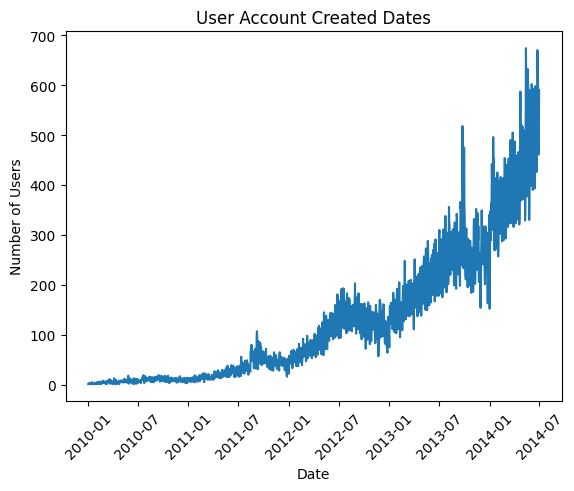

C:\Users\Takodachi\AppData\Local\Temp\ipykernel_2984\2154214643.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value_counts, kde=False, hist_kws={'color': 'green'})


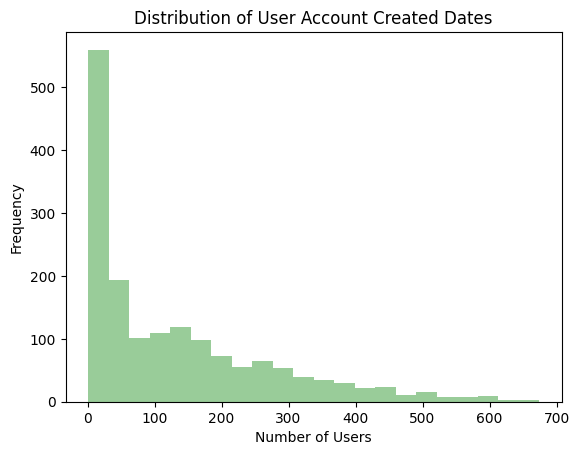

In [7]:
# 轉換日期數據並計算每個日期的數量
date = pd.to_datetime(train_users['date_account_created'])
date_counts = date.value_counts().sort_index()

# 繪製日期分佈圖
sns.lineplot(data=date_counts)
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('User Account Created Dates')
plt.xticks(rotation=45)
plt.show()

# 繪製日期分佈的常態分佈圖
value_counts = date_counts.values
sns.distplot(value_counts, kde=False, hist_kws={'color': 'green'})
plt.xlabel('Number of Users')
plt.ylabel('Frequency')
plt.title('Distribution of User Account Created Dates')
plt.show()


* timestamp_first_active

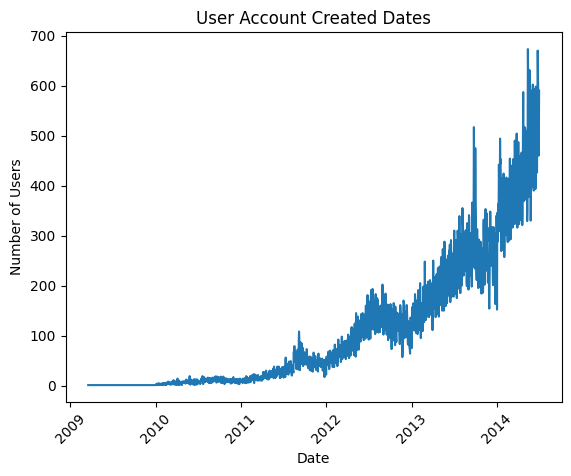

C:\Users\Takodachi\AppData\Local\Temp\ipykernel_2984\3207616816.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value_counts, kde=False, hist_kws={'color': 'red'})


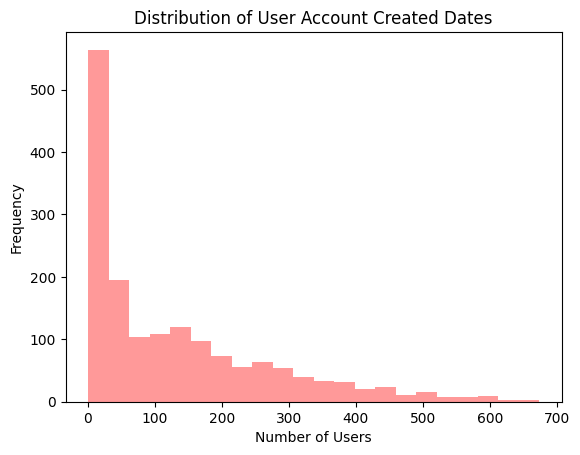

In [8]:
def format_date(timestamp: str) -> str:
    """Converts a timestamp in string format to a date in string format."""
    date_time = pd.to_datetime(timestamp, format='%Y%m%d%H%M%S')
    date = date_time.strftime('%Y-%m-%d')
    return date

first = train_users['timestamp_first_active'].apply(format_date)

train_users['first'] = first
first_date = pd.to_datetime(train_users['first'])
first_day_count = first_date.value_counts().sort_index()
# 繪製日期分佈圖
sns.lineplot(data=first_day_count)
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('User Account Created Dates')
plt.xticks(rotation=45)
plt.show()

# 繪製日期分佈的常態分佈圖
value_counts = first_day_count.values
sns.distplot(value_counts, kde=False, hist_kws={'color': 'red'})
plt.xlabel('Number of Users')
plt.ylabel('Frequency')
plt.title('Distribution of User Account Created Dates')
plt.show()

* date_first_booking 工程

In [9]:
print("The number of missing values in 'date_first_booking' column is %d" % train_users['date_first_booking'].isna().sum())
description = train_users['date_first_booking'].describe()
print("Description of 'date_first_booking' column:")
print("count: %d" % description['count'])
print("unique: %d" % description['unique'])
print("top: %s" % description['top'])
print("freq: %d" % description['freq'])

The number of missing values in 'date_first_booking' column is 124543
Description of 'date_first_booking' column:
count: 88908
unique: 1976
top: 2014-05-22
freq: 248


In [10]:
print("miss rate : %s" % str(int(train_users['date_first_booking'].isna().sum() / len(train_users['date_first_booking']) * 100)) + "%")

miss rate : 58%


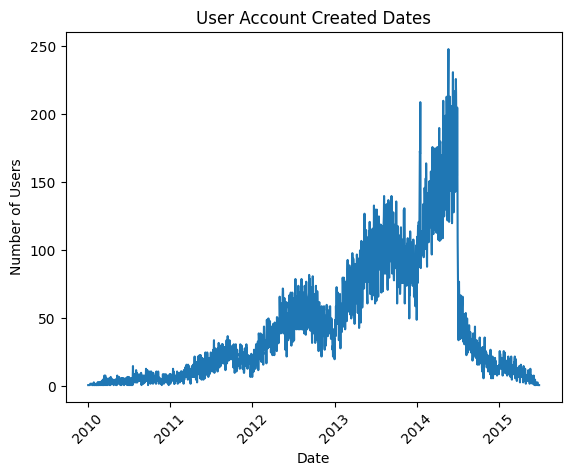

In [11]:
date_first_booking = pd.to_datetime(train_users['date_first_booking'])
date_first_booking_count = date_first_booking.value_counts().sort_index()
# 繪製日期分佈圖
sns.lineplot(data=date_first_booking_count)
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('User Account Created Dates')
plt.xticks(rotation=45)
plt.show()

In [12]:
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'])
average = train_users[(train_users['date_first_booking'] >= '2014-01-01') & (train_users['date_first_booking'] <= '2015-12-31')]['date_first_booking'].mean()
train_users['date_first_booking'] = train_users['date_first_booking'].fillna(average)
print("miss rate : %s" % str(int(train_users['date_first_booking'].isna().sum() / len(train_users['date_first_booking']) * 100)) + "%")

miss rate : 0%


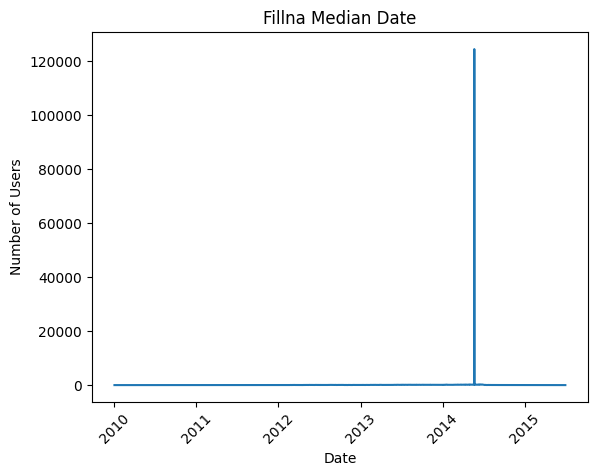

In [13]:
date_first_booking_new = pd.to_datetime(train_users['date_first_booking'])
date_first_booking_count_new = date_first_booking_new.value_counts().sort_index()
# 繪製日期分佈圖
sns.lineplot(data=date_first_booking_count_new)
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Fillna Median Date')
plt.xticks(rotation=45)
plt.show()

* gender

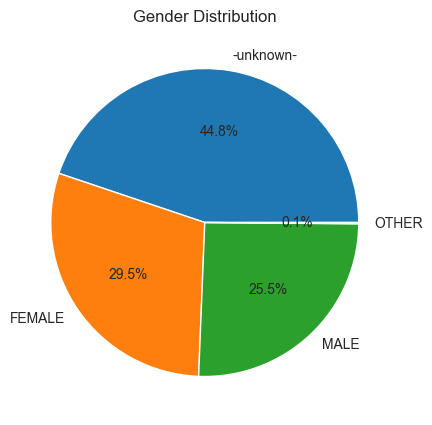

In [14]:
# 計算每個類別的出現次數
counts = train_users['gender'].value_counts()

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

* Age

In [15]:
print("miss rate : %s" % str(int(train_users['age'].isna().sum() / len(train_users['age']) * 100)) + "%")

miss rate : 41%


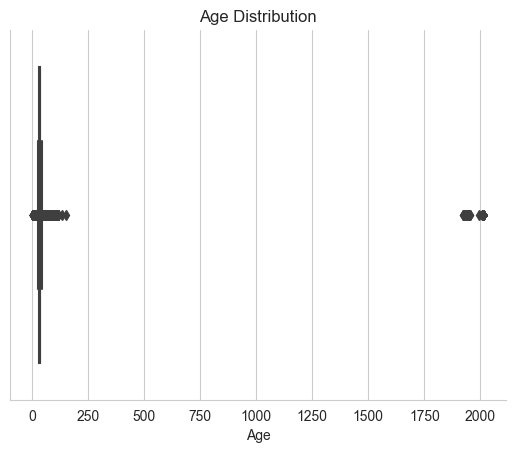

In [16]:
# 填補缺失值
train_users['age'].fillna(train_users['age'].median(), inplace=True)

# 繪製boxplot
sns.boxplot(x='age', data=train_users)

# 設定相關參數
sns.set(style='ticks')
sns.despine()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


count    213451.000000
mean         36.192630
std          11.218331
min           1.000000
25%          32.000000
50%          34.000000
75%          36.000000
max         100.000000
Name: age, dtype: float64


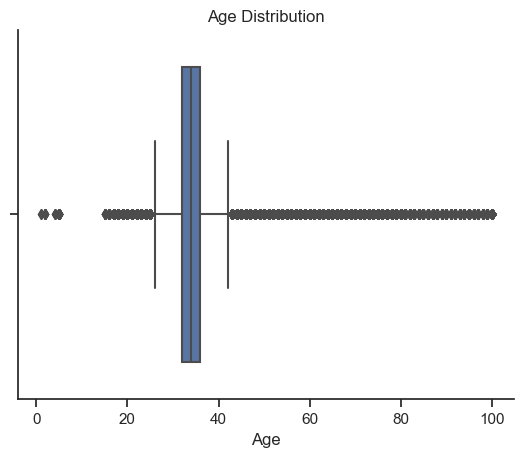

In [17]:
train_users['age'] = train_users['age'].clip(upper=100)
print(train_users['age'].describe())
# 繪製boxplot
sns.boxplot(x='age', data=train_users)

# 設定相關參數
sns.set(style='ticks')
sns.despine()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

* signup_method

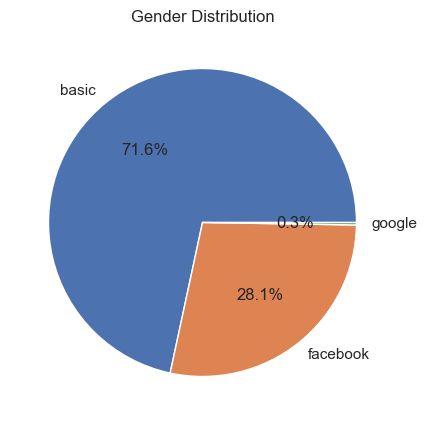

In [18]:
counts = train_users['signup_method'].value_counts()

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

* signup_flow

In [19]:
train_users['signup_flow']

id
gxn3p5htnn     0
820tgsjxq7     0
4ft3gnwmtx     3
bjjt8pjhuk     0
87mebub9p4     0
              ..
zxodksqpep     0
mhewnxesx9     0
6o3arsjbb4     0
jh95kwisub    25
nw9fwlyb5f    25
Name: signup_flow, Length: 213451, dtype: int64

* signup_flow
> en 占大多數 先去除看其他語系

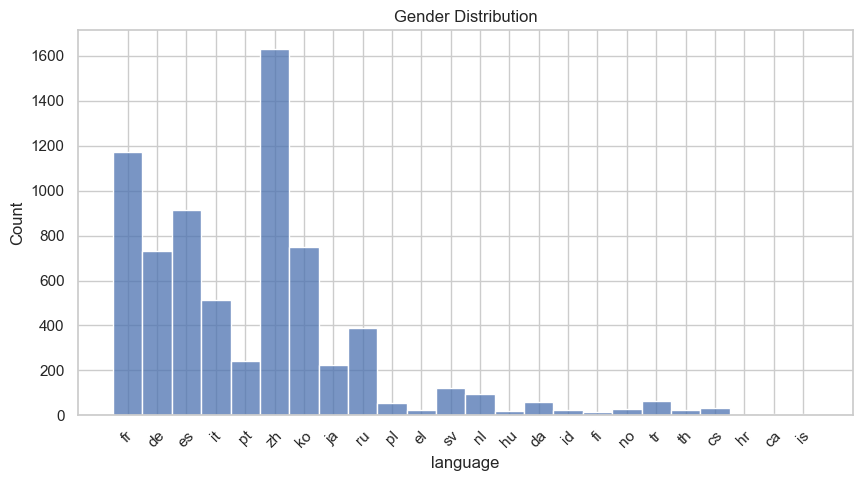

In [20]:
train_users = train_users.drop(train_users[train_users['language'] == 'en'].index)
counts = train_users['language']

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(data=counts)
plt.xticks(rotation=45)
plt.title('Gender Distribution')
plt.show()

* affiliate_channel
> affiliate_channel 是指 Airbnb 用來追踪新用戶是通過哪個網站、網路平台或行銷夥伴來註冊的。例如，如果新用戶是通過某個旅遊網站的連結進入 Airbnb 網站並註冊的，那麼這個旅遊網站就是該新用戶的 affiliate_channel。

> SEM 是 Search Engine Marketing 的縮寫，指的是在搜索引擎上進行的網絡營銷活動，包括搜索廣告和搜索引擎優化等。在 SEM 中，非品牌關鍵詞（Non-Brand）是指與公司或品牌無關的關鍵詞，例如產品種類、產品功能等關鍵詞，這些關鍵詞不包含公司或品牌的名稱或其他相關詞匯。因此，sem-non-brand 可以理解為在搜索引擎營銷中，使用與公司或品牌無關的非品牌關鍵詞進行廣告投放或搜索引擎優化等活動。

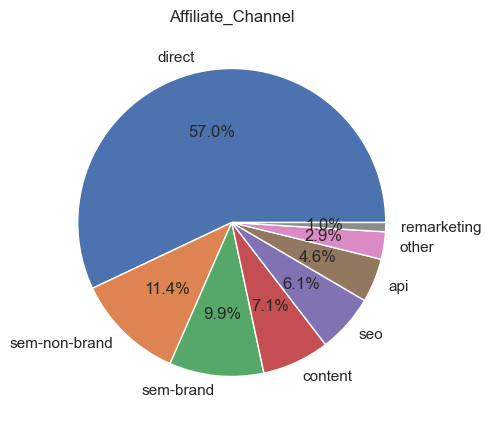

In [21]:
counts = train_users['affiliate_channel'].value_counts()

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Affiliate_Channel')
plt.show()

* affiliate_provider

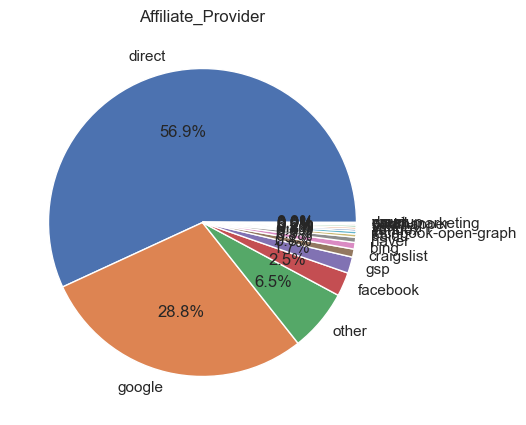

In [22]:
counts = train_users['affiliate_provider'].value_counts()

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Affiliate_Provider')
plt.show()

* first_affiliate_tracked

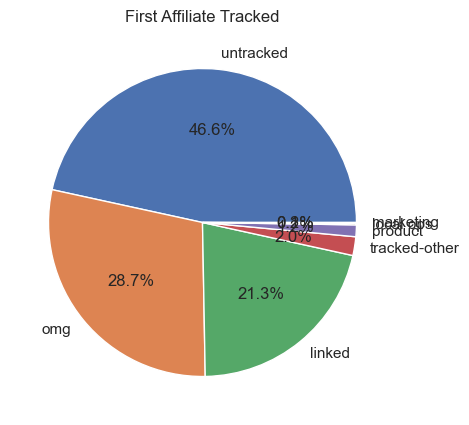

In [23]:
counts = train_users['first_affiliate_tracked'].value_counts()

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('First Affiliate Tracked')
plt.show()

* signup_app

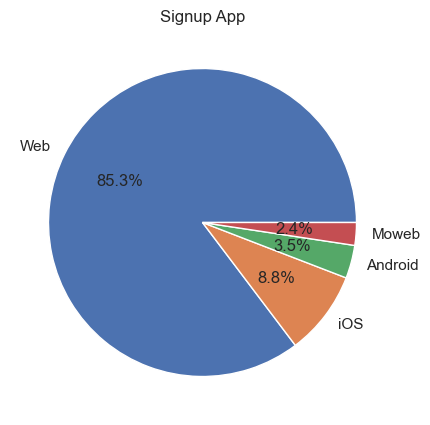

In [24]:
counts = train_users['signup_app'].value_counts()

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Signup App')
plt.show()

* first_device_type

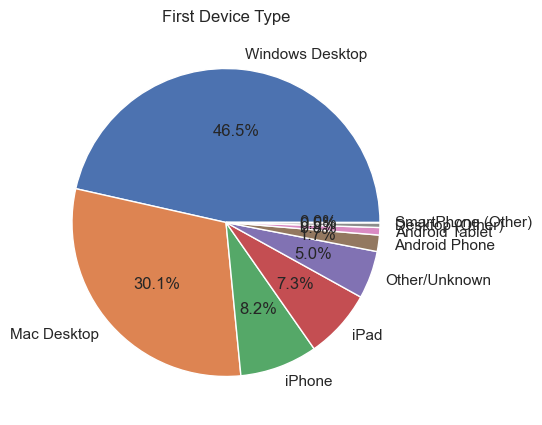

In [25]:
counts = train_users['first_device_type'].value_counts()

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('First Device Type')
plt.show()

* first_browser

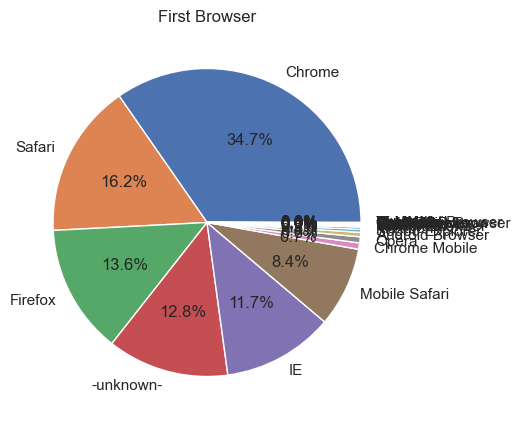

In [26]:
counts = train_users['first_browser'].value_counts()

# 繪製圓餅圖
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('First Browser')
plt.show()

* country_destination: this is the target variable you are to predict